# Objective: 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
# Load Datasets 
sorteos_df = pd.read_csv('../Data/downloaded/sorteos_export.csv')
premios_df = pd.read_csv('../Data/downloaded/premios_export.csv')

In [8]:
# Join datasets by 'numero_sorteo'
df = pd.merge(premios_df, sorteos_df, on='numero_sorteo', how='inner')

# Removing column "id"
df.drop(columns=['id'], inplace=True)

# Save the new dataset for latter analysis in AWS QuickSight
df.to_csv('../Data/processed/data_combined.csv', index=False)

### Data imputation

In [9]:
# replace the null values with "N/A"
"""
Vendedor, ciudad and departamento are categorical variables, 
and filling them with N/A does not affect the analysis.
"""

df['vendedor'] = df['vendedor'].fillna("N/A")
df['ciudad'] = df['ciudad'].fillna("N/A")
df['departamento'] = df['departamento'].fillna("N/A")

df

,numero_sorteo,numero_premiado,letras,monto,vendedor,ciudad,departamento,tipo_sorteo,fecha_sorteo,fecha_caducidad,primer_premio,segundo_premio,tercer_premio,reintegro_primer_premio,reintegro_segundo_premio,reintegro_tercer_premio
0,390,44,P,600.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
1,390,80,DT,600.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
2,390,129,TT,1000.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
3,390,180,DT,600.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
4,390,228,P,800.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31891,3046,79292,P,700.0,N/A,N/A,N/A,ORDINARIO,2024-06-01,2024-12-02,46063,40361,39987,3,1,7
31892,3046,79361,TT,600.0,N/A,N/A,N/A,ORDINARIO,2024-06-01,2024-12-02,46063,40361,39987,3,1,7
31893,3046,79375,P,700.0,N/A,N/A,N/A,ORDINARIO,2024-06-01,2024-12-02,46063,40361,39987,3,1,7
31894,3046,79567,PR,670.0,N/A,N/A,N/A,ORDINARIO,2024-06-01,2024-12-02,46063,40361,39987,3,1,7


### What is the Distribution Prize of Loteria Santa Lucia? (InterQuartile Range)

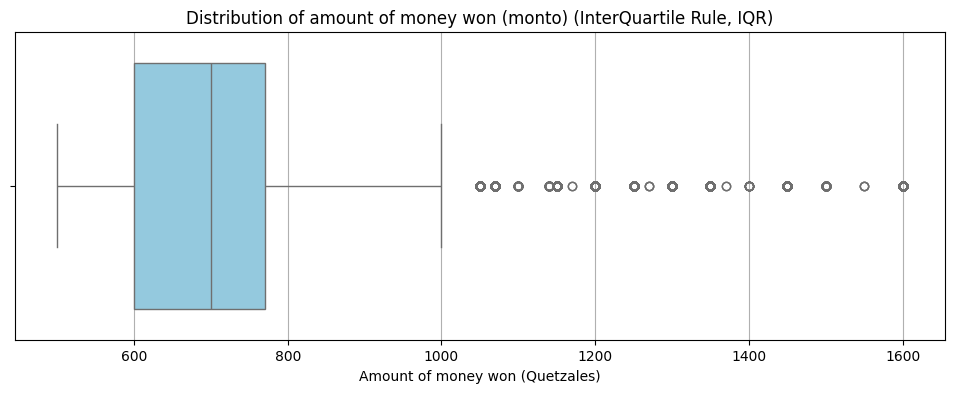

In [22]:
Q1 = df['monto'].quantile(0.25)
Q3 = df['monto'].quantile(0.75)
IQR = Q3 - Q1

# Filter values within the interquartile range
df_filtered_IQR = df[(df['monto'] >= Q1 - 1.5 * IQR) & (df['monto'] <= Q3 + 1.5 * IQR)]

plt.figure(figsize=(12, 4))

# Create boxplot without outliers
sns.boxplot(x=df_filtered_IQR['monto'], color='skyblue')
plt.title("Distribution of amount of money won (monto) (InterQuartile Rule, IQR)")
plt.xlabel("Amount of money won (Quetzales)")
plt.grid(axis='x')
plt.show()

So with this you can see that 50% of the prizes won are **between Q600.00 and almost Q800.00**
With a **median aprox of Q750.00**

### What is the distribution of the Winning Numbers of Loteria Santa Lucia?

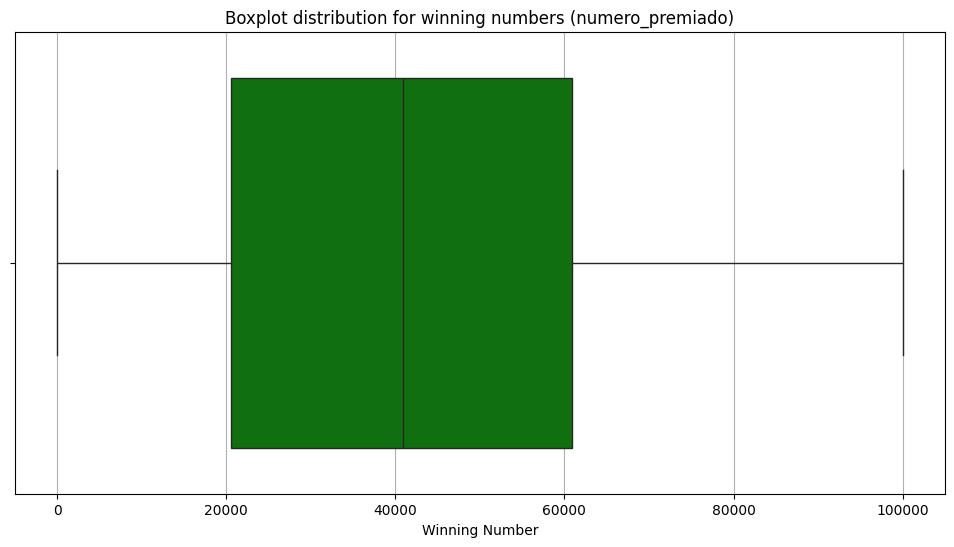

In [20]:
plt.figure(figsize=(12, 6))

# Create boxplot for the winning numbers
sns.boxplot(x=df['numero_premiado'], color='green')
plt.title('Boxplot distribution for winning numbers (numero_premiado)')
plt.xlabel('Winning Number')
plt.grid(axis='x')
plt.show()

So, in the boxplot you can see that **50%** of winning numbers are located **between 21,000 and 62,000** aprox.
With a **median of 42,000**

### What is the distribution for the Letter Combinations (letras) of Loteria Santa Lucia? 

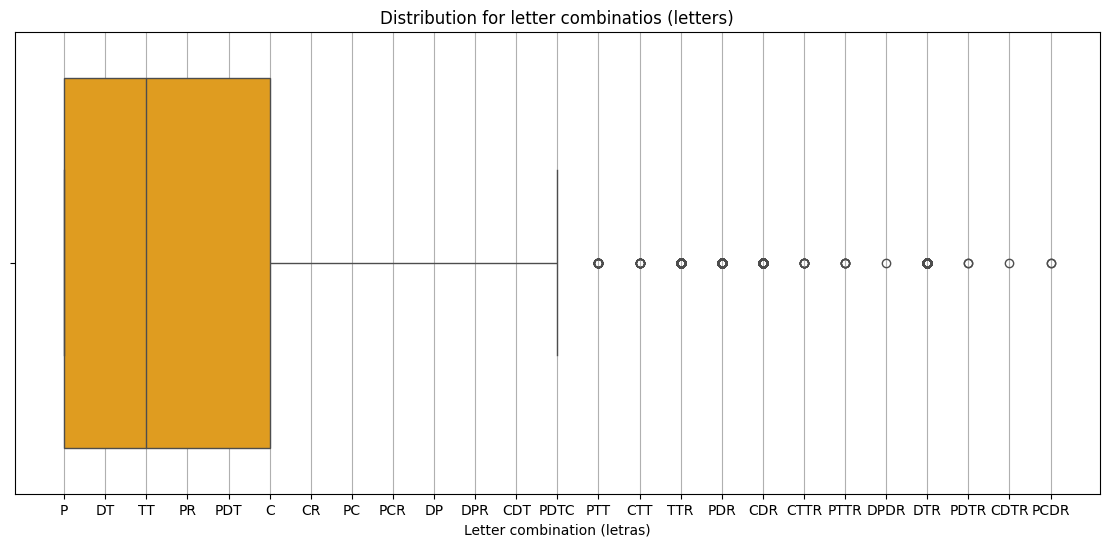

In [ ]:
plt.figure(figsize=(15, 6))

# Create boxplot for letter distribution
sns.boxplot(x=df['letras'], color='orange')
plt.title('Distribution for letter combinatios (letters)')
plt.xlabel('Letter combination (letras)')
plt.grid(axis='x')
plt.show()

### What is the Lottery number that has given the mayor cantity of money in prizes? 